In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [7]:
df= pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df= df.dropna()

In [9]:
df1= df.drop(columns=['Name','Sex','Ticket','Cabin','Embarked'])

In [10]:
df1.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,402.983333,1.216667,41.350000,0.366667,0.450000,64.048262
1,480.918699,1.178862,32.905854,0.512195,0.487805,85.821107


In [11]:
df2= df[['Survived','Sex','Age']]
df2

,Survived,Sex,Age
1,1,female,38.0
3,1,female,35.0
6,0,male,54.0
10,1,female,4.0
11,1,female,58.0
...,...,...,...
871,1,female,47.0
872,0,male,33.0
879,1,female,56.0
887,1,female,19.0


In [12]:
df3= pd.get_dummies(df2,dtype='int')
df3

,Survived,Age,Sex_female,Sex_male
1,1,38.0,1,0
3,1,35.0,1,0
6,0,54.0,0,1
10,1,4.0,1,0
11,1,58.0,1,0
...,...,...,...,...
871,1,47.0,1,0
872,0,33.0,0,1
879,1,56.0,1,0
887,1,19.0,1,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
X= df3.drop(columns=['Survived'])
Y= df3[['Survived']]

In [14]:
model= DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [15]:
ans= model.predict([[38,1,0]])
print(ans)

[1]


In [16]:
model.score(X,Y)

0.9180327868852459

In [17]:
n= int(input('Enter no of people: '))
for i in range(1,n+1):
    age= int(input('Enter age: '))
    sex= input('Enter male or female: ')
    if sex=='male':
        ans= model.predict([[age,0,1]])
        print(ans)
    elif sex=='female':
        ans= model.predict([[age,1,0]])
        print(ans)

Enter no of people:  2
Enter age:  34
Enter male or female:  32
Enter age:  22
Enter male or female:  male


[0]


In [18]:
from sklearn.linear_model import LogisticRegression
X1= df3.drop(columns=['Survived'])
Y1= df3[['Survived']]

In [22]:
model1= LogisticRegression()
model1.fit(X1,Y1)

LogisticRegression()

In [23]:
ans1= model1.predict([[38,1,0]])
print(ans1)

[1]


In [24]:
model1.score(X1,Y1)

0.7650273224043715

In [36]:
from sklearn.linear_model import LogisticRegression
X= df2.drop(columns=['Sex'])
Y= df2[['Age']]

<Axes: xlabel='Sex'>

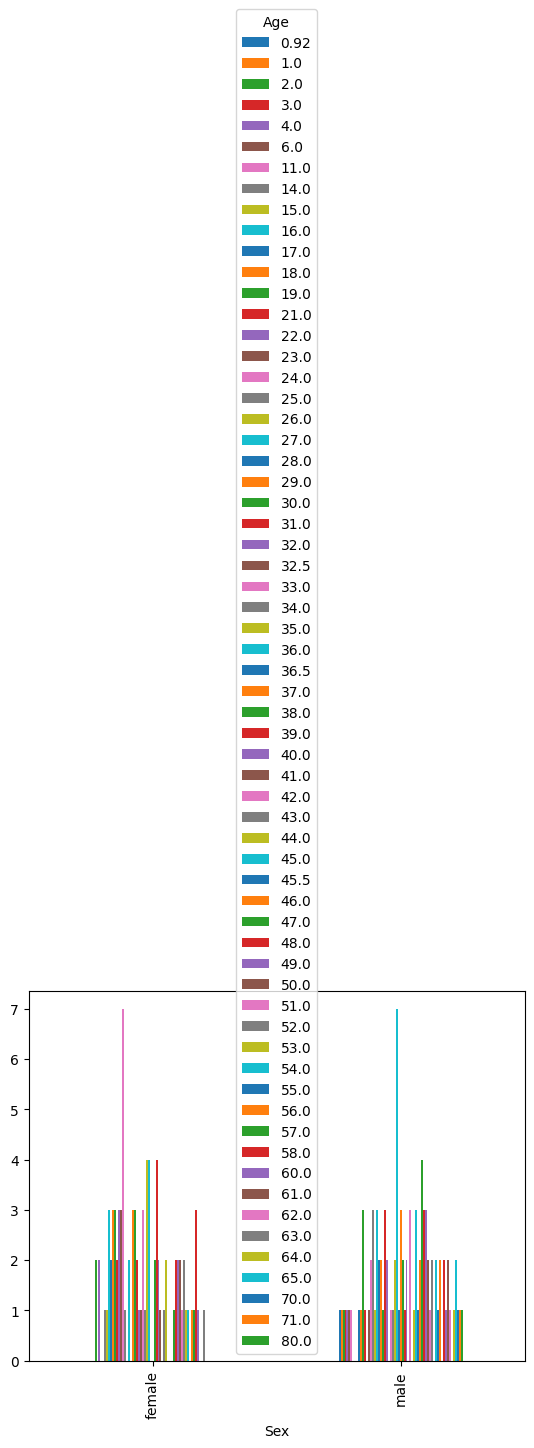

In [35]:
pd.crosstab(df2['Sex'],df2['Age']).plot(kind='bar')